# Joy!

Joy is a tiny creative coding library in Python.

Joy integrates very well with Jupyter notebooks and every shape is
represented as SVG image by jupyter.

## Installation

The easiest way to install it is download `joy.py` and place it in your
directory. The library has no dependencies. 

It can be downloaded from:

<https://github.com/fossunited/joy/raw/main/joy.py>


## Design Approach

Joy follows functional programming approach for it's interface. Each
function/class gives a shape and those shapes can be transformed and
combined using other utililty functions.

By design, there is no global state in the library.

Joy uses SVG to render the shapes and the shapes are really a very thin
wrapper over SVG nodes. It is possible to use every functionality of SVG,
even if that is not exposed in the API.


## Coordinate System

Joy uses a canvas with `(0, 0)` as the center.

By default the size of the canvas is `(300, 300)`.


## The First Steps

The first step is to import the library.

In [1]:
from joy import *

That above line adds all the functionality defined in the `joy` library to the current namespace.

Let's start with creating a circle.

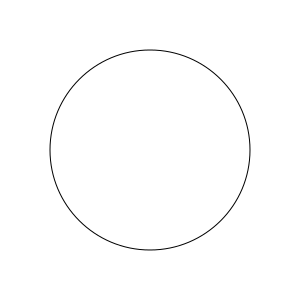

In [2]:
Circle()

The `circle()` function creates a circle and jupyter notebook display it. 

By default, the circle is centered at the origin and have a radius of `100`. We can also specify different values for those parameters.

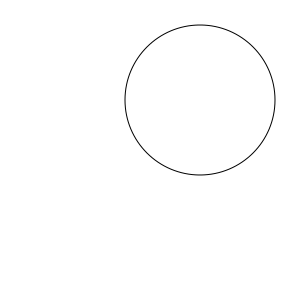

In [3]:
Circle(center=Point(x=50, y=-50), radius=75)

Most of the functions in _Joy_ accepts only named arguments. This helps to make the joy code more readable and easy for new programmers to understand.

The other way to show a shape created in Joy is using the `show` function. 
It addes the bounding box and the axis in the background for reference.

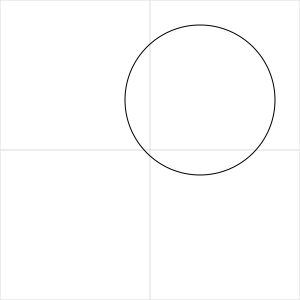

In [4]:
c = Circle(center=Point(x=50, y=-50), radius=75)
show(c)

## Basic Shapes

Joy supports three basic types: `Circle`, `Ellipse`, `Rectangle` and `Line`.

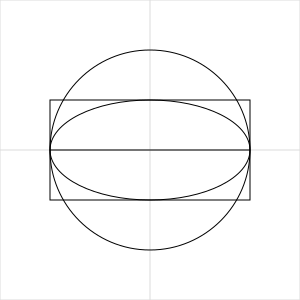

In [5]:
show(Circle(), Ellipse(), Rectangle(), Line())

Each of the basic shapes have sensible defaults to make it easier to get started using them. However, all the parameters can be specified if we wish.

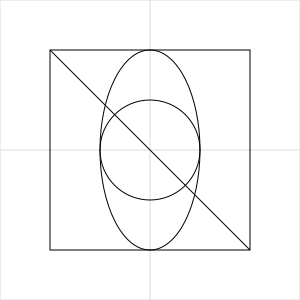

In [6]:
s1 = Circle(radius=50)
s2 = Ellipse(width=100, height=200)
s3 = Rectangle(width=200, height=200)
s4 = Line(start=Point(x=-100, y=-100), end=Point(x=100, y=100))

show(s1, s2, s3, s4)

## Colors

All shapes supports `stroke` and `fill` arguments.

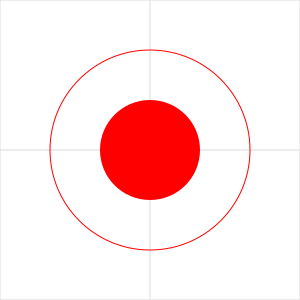

In [7]:
c1 = Circle(radius=100, stroke="red")
c2 = Circle(radius=50, fill="red", stroke="none")
show(c1, c2)

We can also adjust `stroke_width`.

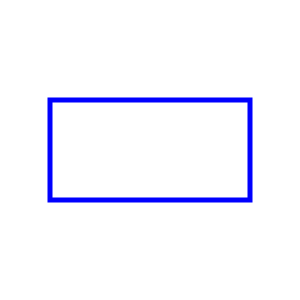

In [8]:
Rectangle(stroke_width=5, stroke="blue")

Since `Joy` renders to SVG, any color that is valid in CSS can be used. Here are some of the way to express value for color:

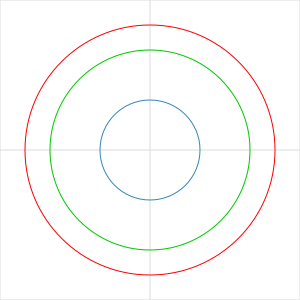

In [9]:
c1 = Circle(radius=125, stroke="red")
c2 = Circle(radius=100, stroke="rgb(0, 200, 0)")
c3 = Circle(radius=50, stroke="#3388bb")
show(c1, c2, c3)

## Combining Shapes

The `+` operator can be used to combine multiple shapes into a single shape.

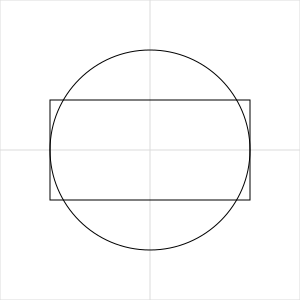

In [10]:
shape = Circle() + Rectangle()
show(shape)

Combining shapes is useful to apply transformations on the combined shape. We'll look into transformations in the next section.


## Transformations

Joy supports `Translate`, `Totate` and `Scale` transformations.

Transformations are applied using the `|` operator.

The `Translate` transformation moves the given shape by `x` and `y`.

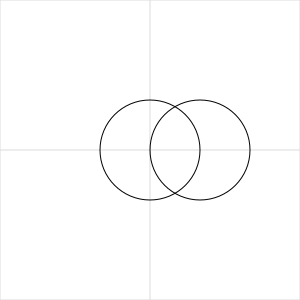

In [11]:
c1 = Circle(radius=50)
c2 = c1 | Translate(x=50, y=0)
show(c1, c2)

The `Rotate` transformation rotates a shape clockwise by the given angle. 

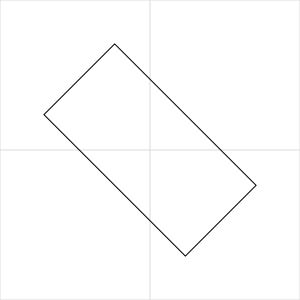

In [12]:
shape = Rectangle() | Rotate(angle=45)
show(shape)

The `Scale` transformation scales a shape.

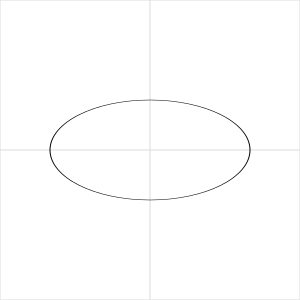

In [13]:
shape = Circle() | Scale(sx=1, sy=0.5)
show(shape)

It is handy to combine shapes and apply transformations on them.

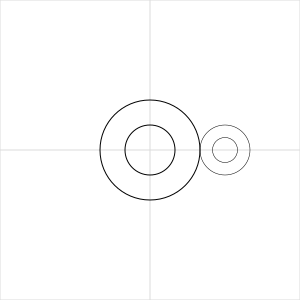

In [14]:
donut = Circle(radius=50) + Circle(radius=25)
donut2 = donut | Scale(0.5) | Translate(x=150, y=0)
show(donut, donut2)

## Higher-Order Transformations

Joy supports higher-order transformation `Repeat`.

The `Repeat` transformation applies a transformation multiple times and
combines all the resulting shapes.

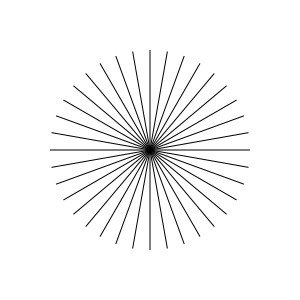

In [15]:
Line() | Repeat(18, Rotate(angle=10))

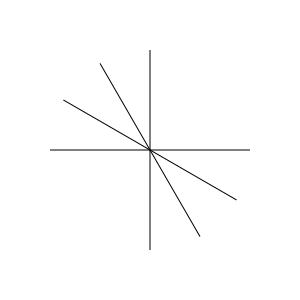

In [16]:
Line() | Repeat(4, Rotate(30))

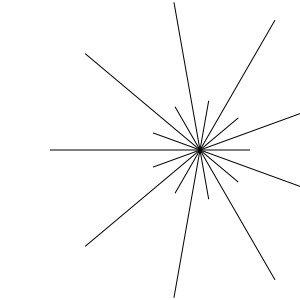

In [17]:
Line() | Repeat(9, Rotate(360/9, anchor=Point(x=50, y=0)))

We could apply that on a square:

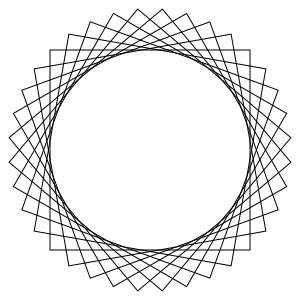

In [18]:
Rectangle(width=200, height=200) | Repeat(9, Rotate(angle=10))

or a rectangle:

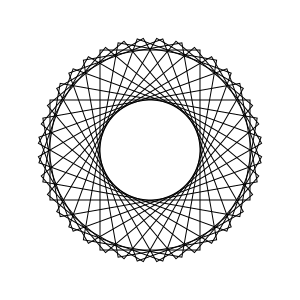

In [19]:
Rectangle(width=200, height=100) | Repeat(18, Rotate(angle=10))

or even a circle.

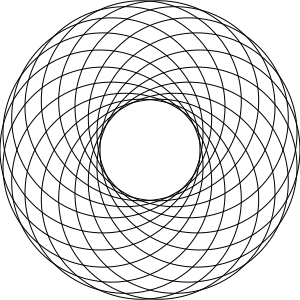

In [20]:
Circle(center=Point(x=50, y=0), radius=100) | Repeat(18, Rotate(angle=20))

We can repeat multiple transformations together.

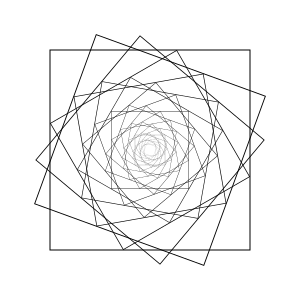

In [21]:
tx = Rotate(angle=20) | Scale(sx=0.9)
Rectangle(width=200, height=200) | Repeat(72, tx)

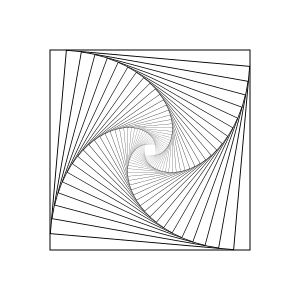

In [22]:
n = 72
angle = 360/n
tx = Rotate(angle=angle) | Scale(sx=0.92)
Rectangle(width=200, height=200) | Repeat(n, tx)

Let's try to create a sprial of circles.

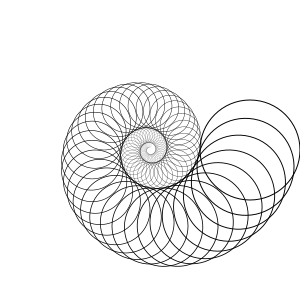

In [23]:
Circle(center=Point(x=100, y=0), radius=50) | Repeat(36*4, Rotate(10) | Scale(0.97))

Thats all, folks!